In [102]:
import numpy as np
import matplotlib.pyplot as plt

In [103]:
def f_true(x):
    return 0.03 * x ** 4 - 0.4 * x ** 2 + 0.7 * np.sin(2.2 * x)

def make_poly_features(x, degree):
    x = np.asarray(x).reshape(-1, 1)
    X = np.hstack([x ** i for i in range(degree + 1)])
    return X

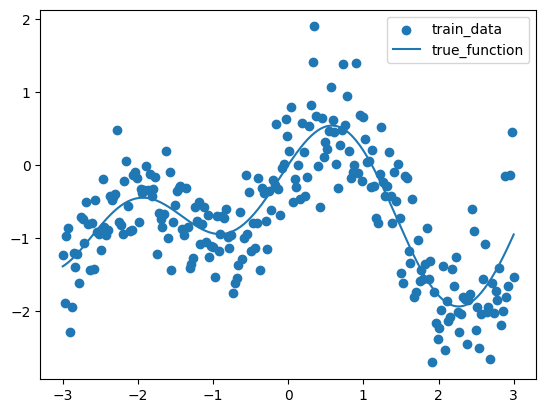

In [244]:
rng = np.random.default_rng(42)

N = 250
x = np.linspace(-3, 3, N)

sigma = 0.5
y = f_true(x) + rng.normal(0, sigma, size=x.shape)

degree = 15
X = make_poly_features(x, degree)

plt.scatter(x, y, label='train_data')
plt.plot(x, f_true(x), label='true_function')
plt.legend()
plt.show()

In [105]:
lamb = 1.0
alpha = 1.0 / (sigma ** 2)

M = X.shape[1]
posterior_cov_inv = lamb * np.eye(M) + alpha * (X.T @ X)

In [106]:
posterior_cov = np.linalg.inv(posterior_cov_inv)
mean = alpha * posterior_cov @ (X.T @ y)

In [107]:
x_new = np.linspace(-3, 3, 400)
X_new = make_poly_features(x_new, degree)

mean_pred = X_new @ mean
var_pred = 1.0 / alpha + np.sum(X_new @ posterior_cov @ X_new.T, axis=1)
std_pred = np.sqrt(var_pred)

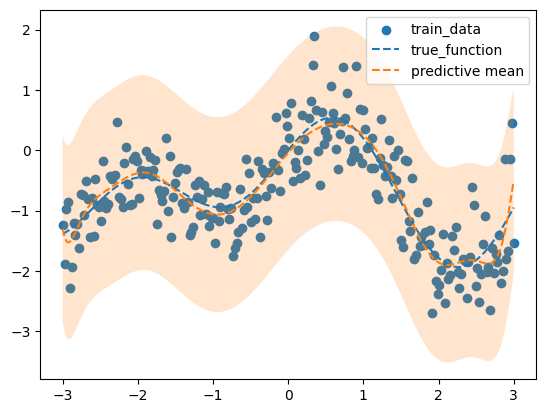

In [108]:
plt.scatter(x, y, label='train_data')
plt.plot(x_new, f_true(x_new), linestyle='--', label='true_function')
plt.plot(x_new, mean_pred, linestyle='--', label='predictive mean')

plt.fill_between(x_new, mean_pred - 2 * std_pred, mean_pred + 2 * std_pred, alpha=0.2)

plt.legend()
plt.show()

In [109]:
np.mean((f_true(x_new) - mean_pred) ** 2) # mse w/ lamb=1

0.011366390507569556

In [110]:
def log_evidence(lamb, X, y, alpha):
    '''
    Тут надо написать расчет log-evidence, через формулу, которая была в лекции
    Далее взять какой-то набор лямбд (например np.logspace(-6, 3, 160)) и оценить для каждой эту функцию
    Получится лучшая лябмда
    Вывести график log-evidence vs lambda + графики, чтобы визуально сравнить предсказания базовой модели и модели с лучшей лямбдой
    '''
    n = X.shape[0]
    
    sigmasq = 1 / alpha
    tausq = sigmasq / lamb
    C = sigmasq * np.eye(n) + tausq * (X @ X.T)
    
    sgn, logdetC = np.linalg.slogdet(C)
    if sgn <= 0: 
        return -np.inf
    
    invC = np.linalg.inv(C)
    logev = (-1/2) * (n * np.log(2 * np.pi) + logdetC + y.T @ invC @ y)
    
    return logev

In [214]:
lambs = np.logspace(-1, 5, 1000) # с <-1 беды 

logevs = []
for lamb in lambs:
    logev = log_evidence(lamb, X, y, alpha)
    logevs.append(logev)

logevs = np.array(logevs)

In [215]:
best_idx = np.argmax(logevs)
best_lamb = lambs[best_idx]
best_logev = logevs[best_idx]

In [216]:
best_lamb

3.086664943337273

In [217]:
best_logev

-262.57868569367014

In [218]:
# lamb < 1/10 => матрица C == мемоджи с кабаном

sigma = 0.5
sigmasq = sigma ** 2
tausq = sigmasq / best_lamb
n = X.shape[0]
C = sigmasq * np.eye(n) + tausq * (X @ X.T)
print(f'{C=}, {np.linalg.det(C)=}')

C=array([[ 1.87603391e+13,  1.66396646e+13,  1.47444631e+13, ...,
        -1.17523104e+13, -1.32874991e+13, -1.50082712e+13],
       [ 1.66396646e+13,  1.47588481e+13,  1.30779883e+13, ...,
        -1.04047268e+13, -1.17639527e+13, -1.32874991e+13],
       [ 1.47444631e+13,  1.30779883e+13,  1.15886698e+13, ...,
        -9.20249215e+12, -1.04047268e+13, -1.17523104e+13],
       ...,
       [-1.17523104e+13, -1.04047268e+13, -9.20249215e+12, ...,
         1.15886698e+13,  1.30779883e+13,  1.47444631e+13],
       [-1.32874991e+13, -1.17639527e+13, -1.04047268e+13, ...,
         1.30779883e+13,  1.47588481e+13,  1.66396646e+13],
       [-1.50082712e+13, -1.32874991e+13, -1.17523104e+13, ...,
         1.47444631e+13,  1.66396646e+13,  1.87603391e+13]]), np.linalg.det(C)=4.550060202637676e-72


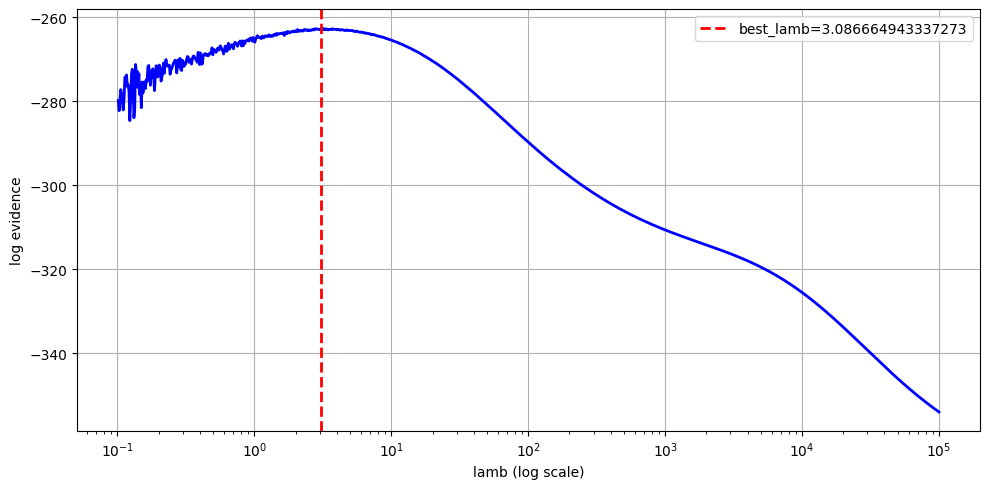

In [220]:
plt.figure(figsize=(10, 5))
plt.semilogx(lambs, logevs, 'b-', linewidth=2)
plt.axvline(best_lamb, color='r', linestyle='--', linewidth=2, label=f'{best_lamb=}')
plt.xlabel('lamb (log scale)')
plt.ylabel('log evidence')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [221]:
lamb = best_lamb
alpha = 1.0 / (sigma ** 2)

M = X.shape[1]
posterior_cov_inv = lamb * np.eye(M) + alpha * (X.T @ X)

In [222]:
posterior_cov = np.linalg.inv(posterior_cov_inv)
mean = alpha * posterior_cov @ (X.T @ y)

In [223]:
x_new = np.linspace(-3, 3, 400)
X_new = make_poly_features(x_new, degree)

mean_pred = X_new @ mean
var_pred = 1.0 / alpha + np.sum(X_new @ posterior_cov @ X_new.T, axis=1)
std_pred = np.sqrt(var_pred)

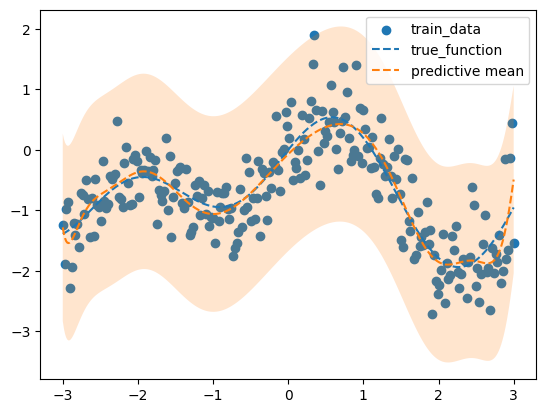

In [224]:
plt.scatter(x, y, label='train_data')
plt.plot(x_new, f_true(x_new), linestyle='--', label='true_function')
plt.plot(x_new, mean_pred, linestyle='--', label='predictive mean')

plt.fill_between(x_new, mean_pred - 2 * std_pred, mean_pred + 2 * std_pred, alpha=0.2)

plt.legend()
plt.show()

In [225]:
np.mean((f_true(x_new) - mean_pred) ** 2) # mse w/ lamb=best_lamb, стало похуже

0.012503534955266536